# Object Detection with Detectron2 - Evaluating
Authors: Saivenkatakrishna Pallampati and Venkat Sai Vainala<br>
Reviewer: Venkat Sai Vainala

## Import Required modules and frameworks
The following cell imports all the required modules, frameworks which are involved in training the model.<br>

In [1]:
import torch, torchvision

import detectron2
from detectron2.utils.logger import setup_logger
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.engine import DefaultTrainer
from detectron2.engine import DefaultPredictor
from detectron2 import model_zoo

from matplotlib import pyplot as plt
import cv2
import os

/home/studio-lab-user/.conda/envs/object-detection-gpu/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Import required modules for visualizing the images
The following cell imports visualizer and to specify the color we import colormode from detectron2 and create class to 
draw predictions and visualize the image.
<br> Original authors - COMP841 Instructors

In [2]:
from detectron2.utils.visualizer import Visualizer
from detectron2.utils.visualizer import ColorMode
def visualize_results(results, image):
    v = Visualizer(image[:, :, ::-1],
        metadata = MetadataCatalog.get("car"),
        scale = 1.0)
    v = v.draw_instance_predictions(results.to("cpu"))
    plt.subplot(), plt.imshow(v.get_image()[:, :, ::-1])
    plt.xticks([]), plt.yticks([])
    plt.show()

### Evaluating
The following cells are used to evaluate and configure the model which we trained in our dataset.
<br>Original authors - COMP841 Instructors

In [3]:
MODEL = "../models/model_final.pth"
PATH_IMAGES = "../data/data/images/train"
PATH_LABELS = "../data/data/labels/labels_train_coco.json"
PATH_OUTPUT = "../output"

In [4]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = MODEL
cfg.DATASETS.TRAIN = ("car")
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 4
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.01
cfg.SOLVER.MAX_ITER = 600
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1
cfg.OUTPUT_DIR = PATH_OUTPUT
cfg.MODEL.DEVICE = "cpu"

### Load and Visualise the images
The following cell load the test data and predict the image by using bounding boxes and segmentation masks in an test image and visualise the image.
<br>Original authors - COMP841 Instructors

/home/studio-lab-user/.conda/envs/object-detection-gpu/lib/python3.9/site-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/home/studio-lab-user/.conda/envs/object-detection-gpu/lib/python3.9/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


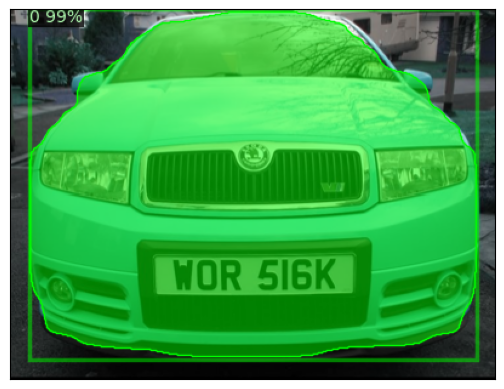

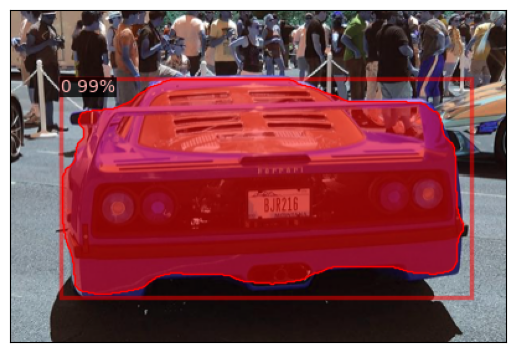

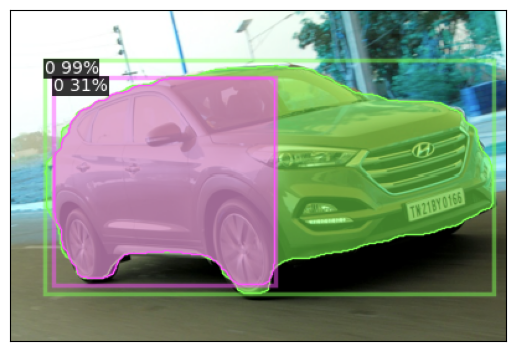

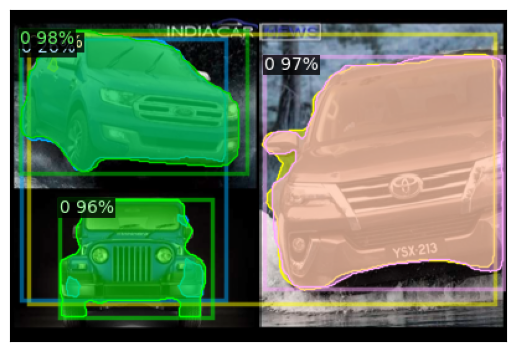

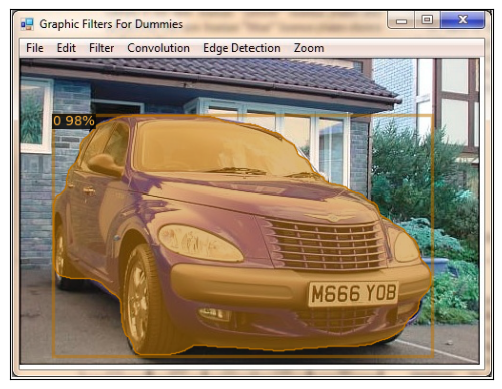

In [5]:
path = "../data/data/images/test/"
images = [path + im for im in os.listdir(path)]

predictor = DefaultPredictor(cfg)
for i in range(5):
    image = cv2.imread(images[i])
    predictions = predictor(image)
    visualize_results(predictions["instances"], image)